# Digit Recognition with a Convolutional Neural Network

---

### Import the necessary packages

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras import utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd

import keras
from keras.utils import to_categorical


%matplotlib inline

In [25]:
# 1.- Load the training data (train.csv) from Kaggle
data = pd.read_csv('train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Check the shape
data.shape

(42000, 785)

In [27]:
# 2.- Setup X and y (feature matrix and target vector)
X = data.drop('label', axis=1)
y = data['label'].astype('int')

# 3.- Split X and y into train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [28]:
# Check the y-values (the 'labels' column with numbers)
y[:10]

0    1
1    0
2    1
3    4
4    0
5    0
6    7
7    3
8    5
9    3
Name: label, dtype: int64

In [29]:
# Reshape the x_train and x_test for a 4-dimensions sequential neural network
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))#.astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))#.astype('float32')

In [30]:
# Check the shape again (needs to be 4-dimensions)
X_test.shape

(10500, 28, 28, 1)

In [31]:
# 4.- Preprocess your data
# - When dealing with image data, you need to normalize your X by dividing each value by the max value of a pixel (255).
X_train /= 255
X_test /= 255

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


# - Since this is a multiclass classification problem, keras needs y to be a one-hot encoded matrix
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [32]:
# Check the one-hot encoded matrix
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

# The (CNN) Model 

In [33]:
# 5.- Create your network
# - Remember that for multi-class classification you need a softamx activation function on the output layer.
# - We should consider using regularization or dropout to improve performance.

from keras import regularizers
cnn_model = Sequential()
#n_input = X_train.shape[1]


In [34]:
cnn_model.add(Conv2D(filters = 6,            # number of filters
                     kernel_size = (3,3),        # height/width of filter
                     activation='relu',      # activation function 
                     input_shape=(28,28,1))) # shape of input (image)

cnn_model.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling

cnn_model.add(Conv2D(16,
                     kernel_size = (3,3),
                     activation='relu'))

cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(128,
                    activation='relu'))  #  input_dim = n_input,
cnn_model.add(Dense(10, 
                    activation='softmax'))

# Compile model
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [36]:
# Fit model on training data
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=256,
                        validation_data=(X_test, y_test),
                        epochs=100,
                        verbose=1)

Train on 31500 samples, validate on 10500 samples
Epoch 1/100
31500/31500 [==============================] - 4s 112us/sample - loss: 0.2648 - accuracy: 0.9231 - val_loss: 0.2514 - val_accuracy: 0.9250
Epoch 2/100
31500/31500 [==============================] - 3s 108us/sample - loss: 0.2275 - accuracy: 0.9338 - val_loss: 0.2190 - val_accuracy: 0.9349
Epoch 3/100
31500/31500 [==============================] - 4s 112us/sample - loss: 0.2010 - accuracy: 0.9396 - val_loss: 0.1935 - val_accuracy: 0.9429
Epoch 4/100
31500/31500 [==============================] - 4s 113us/sample - loss: 0.1768 - accuracy: 0.9476 - val_loss: 0.1747 - val_accuracy: 0.9490
Epoch 5/100
31500/31500 [==============================] - 4s 116us/sample - loss: 0.1586 - accuracy: 0.9519 - val_loss: 0.1557 - val_accuracy: 0.9526
Epoch 6/100
31500/31500 [==============================] - 3s 104us/sample - loss: 0.1471 - accuracy: 0.9547 - val_loss: 0.1544 - val_accuracy: 0.9546
Epoch 7/100
31500/31500 [===================

31500/31500 [==============================] - 4s 112us/sample - loss: 0.0150 - accuracy: 0.9958 - val_loss: 0.0740 - val_accuracy: 0.9819
Epoch 55/100
31500/31500 [==============================] - 3s 110us/sample - loss: 0.0146 - accuracy: 0.9957 - val_loss: 0.0713 - val_accuracy: 0.9820
Epoch 56/100
31500/31500 [==============================] - 4s 112us/sample - loss: 0.0138 - accuracy: 0.9964 - val_loss: 0.0719 - val_accuracy: 0.9809
Epoch 57/100
31500/31500 [==============================] - 3s 110us/sample - loss: 0.0129 - accuracy: 0.9964 - val_loss: 0.0797 - val_accuracy: 0.9803
Epoch 58/100
31500/31500 [==============================] - 4s 114us/sample - loss: 0.0169 - accuracy: 0.9948 - val_loss: 0.0673 - val_accuracy: 0.9822
Epoch 59/100
31500/31500 [==============================] - 4s 113us/sample - loss: 0.0129 - accuracy: 0.9963 - val_loss: 0.0790 - val_accuracy: 0.9808
Epoch 60/100
31500/31500 [==============================] - 3s 110us/sample - loss: 0.0127 - accuracy

In [37]:
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               51328     
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

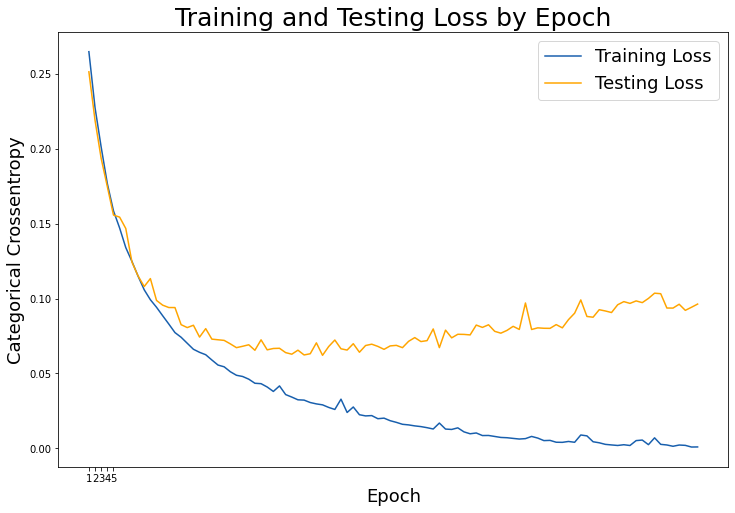

In [38]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])

plt.legend(fontsize = 18);

In [39]:
# Note: we can see that there has been strong overfitting, which results in a less-accurate test-score than train-score. 
# This will also affect our predictions

In [40]:
# Evaluate model on test data.
cnn_score = cnn_model.evaluate(X_test,
                               y_test,
                               verbose=1)

cnn_labels = cnn_model.metrics_names

10500/10500 [==============================] - 1s 83us/sample - loss: 0.0963 - accuracy: 0.9840


In [42]:
# Compare CNN and FFNN models.
print(f'CNN {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN {cnn_labels[1]}   : {cnn_score[1]}')

CNN loss  : 0.09633603734728818
CNN accuracy   : 0.984000027179718


# Preparing Submission (for Kaggle competition)

In [43]:
test = pd.read_csv('test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
test.shape

(28000, 784)

In [45]:
text_X = test[test.columns]

In [46]:
text_X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
text_X.shape

(28000, 784)

In [48]:
test_array = np.array(text_X)

In [49]:
test_array.shape

(28000, 784)

In [50]:
test_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [51]:
test_array[:10].argmax(axis=1)

array([536, 575, 186, 543, 436, 356, 127, 405, 289, 125])

In [52]:
test_array= np.array(test_array)

In [53]:
test_array.shape

(28000, 784)

In [54]:
test_array = test_array.reshape((test_array.shape[0], 28, 28, 1))#.astype('float32')

In [55]:
test_array.shape

(28000, 28, 28, 1)

In [56]:
test_array.argmax(axis=1)

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]])

## Predicts

In [58]:
# CNN Model
cnn_predicts = cnn_model.predict(test_array).argmax(axis=1)

In [59]:
cnn_predicts[:10]

array([2, 7, 9, 9, 3, 7, 0, 3, 0, 3])

In [60]:
cnn_predicts.min()

0

In [61]:
cnn_predicts.max()

9

In [62]:
cnn_predicts.shape

(28000,)

In [63]:
submission = pd.DataFrame(test.index+1)

In [64]:
submission['Label'] = cnn_predicts

In [65]:
submission.tail()

,0,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2


In [66]:
submission.rename(columns={0: 'ImageId'}, inplace=True)

In [67]:
submission.head()

,ImageId,Label
0,1,2
1,2,7
2,3,9
3,4,9
4,5,3


# Submission

In [68]:
# First Submission 
submission.to_csv('CNN_model.csv', index=False)

In [69]:
submission.shape

(28000, 2)

In [70]:
submission.head()

,ImageId,Label
0,1,2
1,2,7
2,3,9
3,4,9
4,5,3


# Done!